In [ ]:
import pandas as pd
import pickle

In [ ]:
with open("/content/drive/MyDrive/Trick_NN/Media/5model.pkl", "rb") as fp:   #Pickling
  models_master_hist = pickle.load(fp)

In [ ]:
imgs = []
import numpy as np
 
for cnt in range(10):
  ims = [x[cnt][0][-1] for x in  models_master_hist]
  ims.append(models_master_hist[0][cnt][0][0])
  imgs.append(ims)
 
labs = []
for cnt in range(10):
  lab = [np.argmax(x[cnt][1][-1]) for x in  models_master_hist]
  lab.append(np.argmax(models_master_hist[0][cnt][1][0]))
  labs.append(lab)

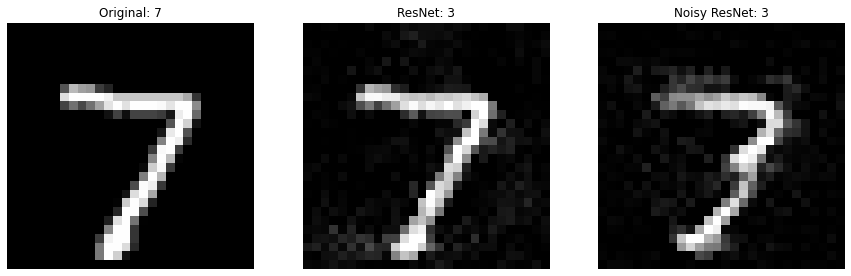

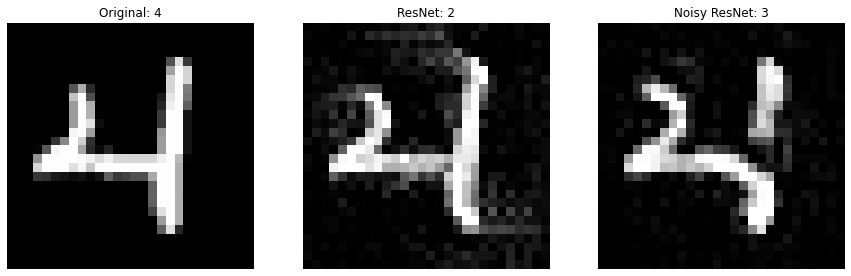

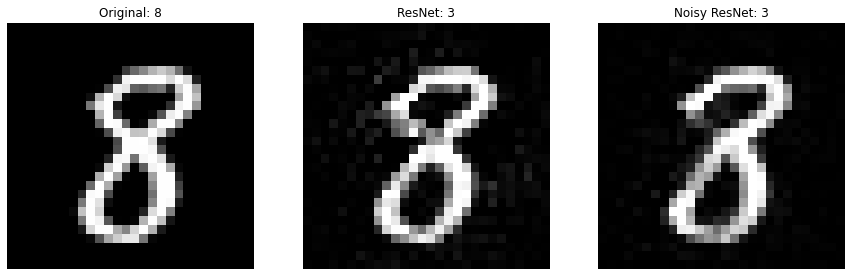

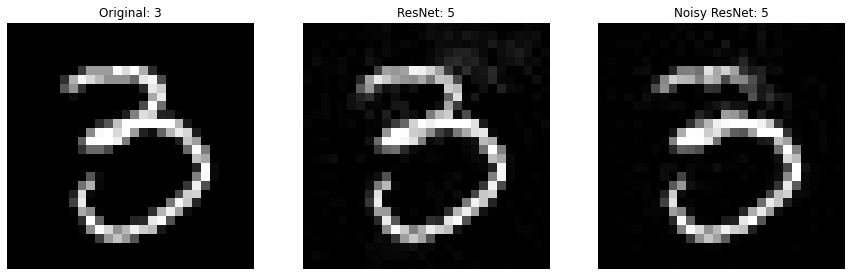

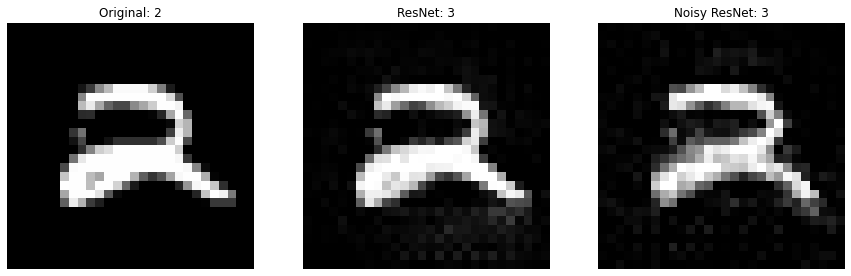

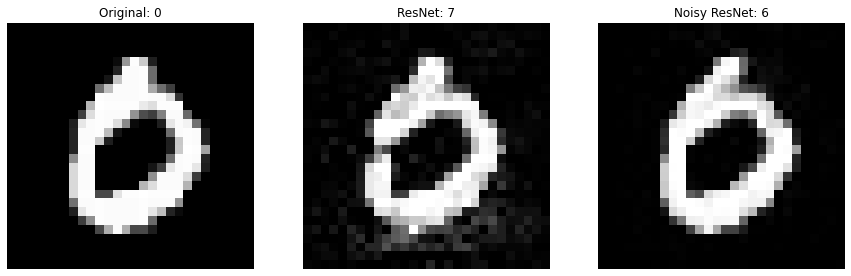

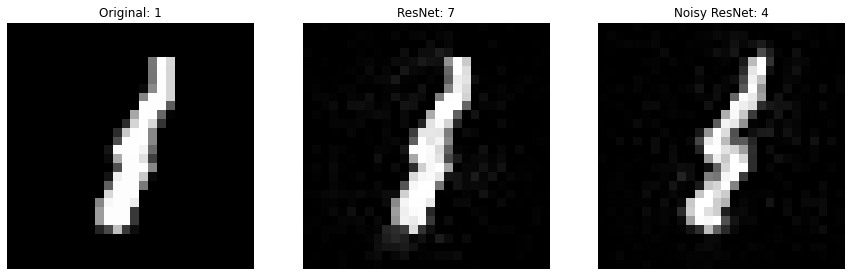

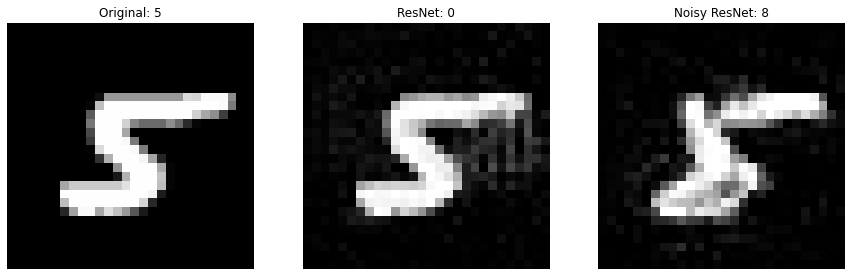

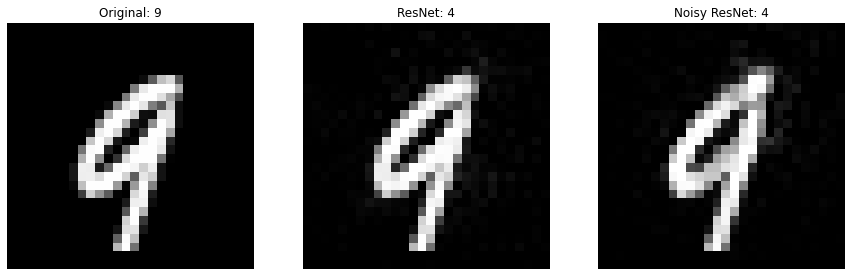

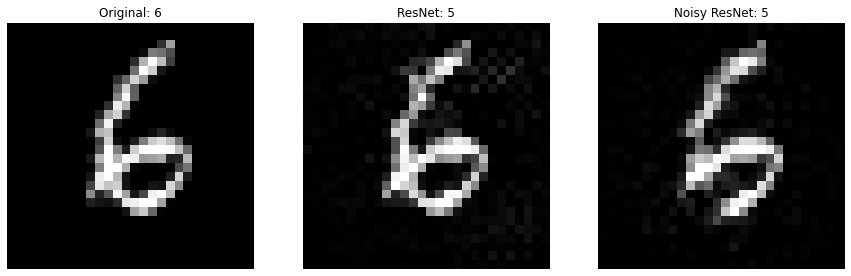

In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
labs2 = ["7", "4", "8", "3", "2", "0", "1", "5", "9", "6"]
 
for cnt,imset in enumerate(imgs):
  fig, (ax1,ax4,ax5) = plt.subplots(1,3)
  fig.set_figheight(10)
  fig.set_figwidth(15)
  img1 = ax1.imshow(imset[4].reshape((28,28)), cmap = "gray")
  img4 = ax4.imshow(imset[2].reshape((28,28)), cmap = "gray")
  img5 = ax5.imshow(imset[3].reshape((28,28)), cmap = "gray")
  ax1.axis('off')
  ax4.axis('off')
  ax5.axis('off')
  if cnt >= 0:
    ax1.set_title("Original: " + str(labs[cnt][-1]))
    ax4.set_title("ResNet: " + str(labs[cnt][2]))
    ax5.set_title("Noisy ResNet: "  + str(labs[cnt][3]))
  else:
    ax1.set_title(labs[cnt][-1])
    ax4.set_title(labs[cnt][2])
    ax5.set_title(labs[cnt][3])
  #plt.savefig("/content/drive/MyDrive/Trick_NN/Media/" + labs2[cnt] + "conversion.png")

In [ ]:
from copy import deepcopy
focus = deepcopy(models_master_hist[2:])

In [ ]:
master_hist = []
 
for cnt in range(10):
  temp = []
  rn = focus[0][cnt]
  nrn = focus[1][cnt]
 
  setLen = max(len(rn[0]), len(nrn[0])) 
  print(setLen)
 
  for val in [rn[0], rn[1], nrn[0], nrn[1]]:
    print(type(val))
    while len(val) < setLen:
      val.append(val[-1])
    temp.append(np.array(val))
  master_hist.append(temp)

553
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
592
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
309
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
274
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
240
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
271
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
228
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
435
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
154
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
278
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


............

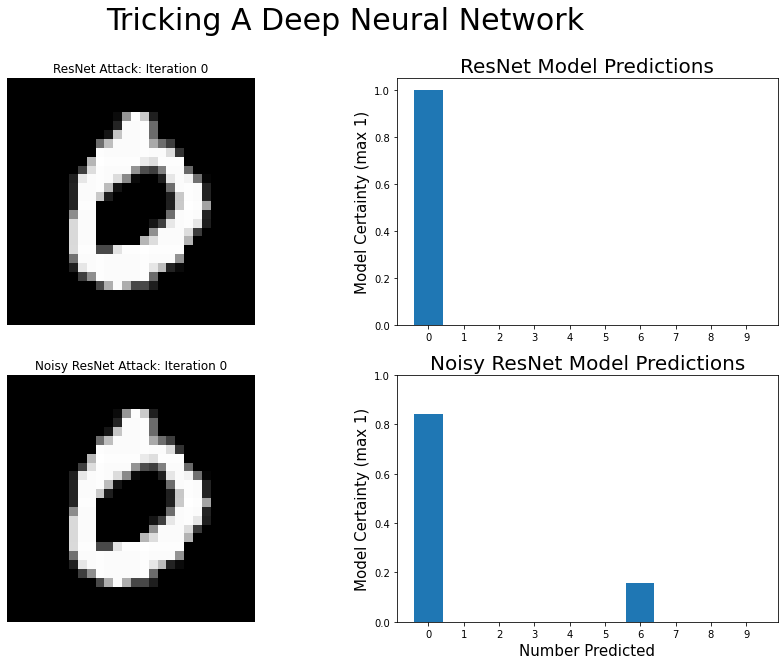

In [8]:
langs = list(range(0,10))
labs = ["7", "4", "8", "3", "2", "0", "1", "5", "9", "6"]
 
for cnt, (hist1, histp1, hist2, histp2) in enumerate(master_hist[5:6]):
  cnt = 5
  histp1 = np.array(histp1)[:,0]
  histp2 = np.array(histp2)[:,0]
  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib.animation as animation
  n=histp1.shape[0]
 
 
  def barlist(n): 
      return histp1[n]
  
  def barlist2(n): 
      return histp2[n]
 
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
 
 
  fig.set_figheight(10)
  fig.set_figwidth(15)
 
  fig.suptitle("Tricking A Deep Neural Network", fontsize=30)
  snapshots = [x.reshape((28,28)) for x in hist1]
  snapshots2 = [x.reshape((28,28)) for x in hist2]
 
 
  img1 = ax1.imshow(hist1[0].reshape((28,28)), cmap="gray")
  ax1.axis('off')
  img2 = ax2.bar(langs, histp1[0])
  ax2.set_xticks(langs)
  ax2.set_xticklabels(langs)
  ax2.set_title("ResNet Model Predictions", fontsize=20)
  ax2.set_ylabel("Model Certainty (max 1)", fontsize=15)
 
  img3 = ax3.imshow(hist2[0].reshape((28,28)), cmap="gray")
  ax3.axis('off')
  img4 = ax4.bar(langs, histp2[0])
  ax4.set_xticks(langs)
  ax4.set_xticklabels(langs)
  ax4.set_title("Noisy ResNet Model Predictions", fontsize=20)
  ax4.set_xlabel("Number Predicted",fontsize=15)
  ax4.set_ylabel("Model Certainty (max 1)", fontsize=15)
  ax4.set_ylim(bottom=0, top=1)
 
  # initialize the data arrays 
  xdata, y1data, y2data = [], [], []
  fps = 30
  def run(i):
    if i % fps == 0:
      print( '.', end ='' )
    img1.set_array(snapshots[i])
    ax1.set_title("ResNet Attack: Iteration " + str(min(i, len(models_master_hist[2][cnt][0]))))
 
    img3.set_array(snapshots2[i])
    ax3.set_title("Noisy ResNet Attack: Iteration " + str(min(i, len(models_master_hist[3][cnt][0]))))
 
    y=barlist(i)
    y2=barlist2(i)
    for i, b in enumerate(img2):
        b.set_height(y[i])
    for i, b in enumerate(img4):
        b.set_height(y2[i])
      
 
  ani = animation.FuncAnimation(fig, run, frames=n, blit=False, interval=100,
      repeat=False)
  #ani.save('/content/drive/MyDrive/AttackNN_images/test_anim' + str(labs[cnt]) + '.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
  ani.save('/content/drive/MyDrive/Trick_NN/Media/prog' + str(labs[cnt]) + '.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])